# Part 2: Transforming Data and Plotting Visualizations
## Washington DC Taxi Data Exploratory Analysis

Created by Joshua Malamud

# Table of Contents

Download Taxi Data

1. Import Libraries

2. Clear Local Data from Previous Project Iteration

3. Read in Data from Local Folder

    * 3.1 Unzip and Read in Data to Local Folder

    * 3.2 Load Multiple Files into Single Dataframe

    * 3.3 Combine Monthly Trips into Concatenated Dataframe

4. Transform Data for Temporal Analysis

    * 4.1 Convert Timestamp Field to Date Time Format

    * 4.2 Extract Date and Time Dimensions

5. Plot Visualizations to Reveal Temporal Trends

    * 5.1 Plot Monthly Taxi Trips

    * 5.2 Plot Hourly Taxi Trips by Weekday

    * 5.3 Plot Average Taxi Speed by Hour of Day

        * 5.3.1 Inspect Data for Invalid Outliers

        * 5.3.2 Plot Average Taxi Speed (cleaned) 

6. Conclusion

**Primary Libraries:** <br>Pandas used to read in and manipulate open source data. Matplotlib used to visualize temporal data analysis. 

# Download Taxi Data
A copy of the taxi data is provided in the data folder, but feel free to follow steps below to access it externally.  
<br><br>Monthly taxi data is available through the [Open Data DC portal](https://opendata.dc.gov/) going back to 2018. Search for "taxi trips in 2023" to download a zip file with monthly taxi trips for 2023. 
<br><br>![image](images/1.open-data-dc-taxi-trips-2023.PNG)

Selecting **Taxi Trips in 2023** will route you to a Box download page and you can select **Download** to download a zip file to your local downloads folder.
<br><br>![image](images/2.trips-download-file.PNG)
<br><br>Move downloaded zip file to desired project folder for data analysis.

# 1. Import Libraries

In [49]:
# import libraries
import os
from pathlib import Path
import pandas as pd
import urllib
import json
import zipfile
from zipfile import ZipFile
import glob
from openpyxl import Workbook
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 2. Clear Local Data from Previous Project Iteration

In [ ]:
# clear folder from previous exercises leaving only trip data zip file
dir_name = 'washdc-taxi-exploratory-analysis\data\OpenDataDC_Taxi_2023.zip'
folder = os.listdir(dir_name)

for item in folder:
    if item.endswith(".csv") or item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

# 3. Read in Data from Local Folder
## 3.1 Unzip and Read in Data to Local Folder

In [ ]:
# assign path to data folder
data_path = 'washdc-taxi-exploratory-analysis\data\OpenDataDC_Taxi_2023.zip'

# file name to download
file = "OpenDataDC_Taxi_2023.zip"

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# open ZIP file in read mode and extract all files inside the ZIP file
with zipfile.ZipFile(fullfilename, "r") as file:
    file.extractall(data_path)

['README_DC_Taxicab_trip.txt', 'taxi_202301.csv', 'taxi_202302.csv', 'taxi_202303.csv', 'taxi_202304.csv', 'taxi_202305.csv', 'taxi_202306.csv', 'taxi_202307.csv', 'taxi_202308.csv', 'taxi_202309.csv', 'taxi_202310.csv', 'taxi_202311.csv', 'taxi_202312.csv']


## 3.2 Load Multiple Files into Single Dataframe

In [52]:
# load monthly files into a single df and visualize process using glob library
all_dfs = []
for one_filename in glob.glob(r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv'):
    #print(f'Loading {one_filename}')
    new_df= pd.read_csv(one_filename,
# select columns necessary for analysis to consolidate df
                 usecols=['OBJECTID', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'ORIGINZIP', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'FAREAMOUNT', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGINZIP']) 
    all_dfs.append(new_df)

len(all_dfs)

12

## 3.3 Combine Monthly Trips into Concatenated Dataframe

In [53]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips

rows: 3,092,555
columns: 10


,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,1,15.79,2DA,22202,5.76000,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00
1,2,10.81,20011,20011,3.11000,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00
2,3,13.51,20001,20007,4.80000,539.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
3,4,12.97,20005,20024,2.68000,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00
4,5,16.48,20001,20002,5.76000,876.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
...,...,...,...,...,...,...,...,...,...,...
199303,199304,40.24,20004,20011,9.63000,3024.0,38.895463,-77.021917,12/31/2023 23:00,01/01/2024 00:00
199304,199305,10.00,20002,20002,0.00000,106.0,38.901547,-76.979938,12/31/2023 23:00,12/31/2023 23:00
199305,199306,12.47,20002,20037,2.73000,1078.0,38.897204,-77.008388,12/31/2023 23:00,12/31/2023 23:00
199306,199307,15.67,20002,20010,3.54000,1269.0,38.897204,-77.008388,12/31/2023 23:00,01/01/2024 00:00


# 4. Transform Data for Temporal Analysis

## 4.1 Convert Timestamp Field to Date Time Format

In [54]:
# convert pickup timestamp to datetime column and add month column
taxi_trips['pickup_dt'] = pd.to_datetime(taxi_trips['ORIGINDATETIME_TR'])  

taxi_trips.dtypes

OBJECTID                           int64
FAREAMOUNT                       float64
ORIGINZIP                         object
DESTINATIONZIP                    object
MILEAGE                          float64
DURATION                         float64
ORIGIN_BLOCK_LATITUDE            float64
ORIGIN_BLOCK_LONGITUDE           float64
ORIGINDATETIME_TR                 object
DESTINATIONDATETIME_TR            object
pickup_dt                 datetime64[ns]
dtype: object

## 4.2 Extract Date and Time Dimensions

In [55]:
# convert UTC date time column to local time zone
taxi_trips["pickup_est"] = (
    taxi_trips["pickup_dt"].dt.tz_localize("UTC").dt.tz_convert("US/Eastern")
)
# extract hour, weekday name, and weekday number in local time zone
taxi_trips["hour"] = pd.DatetimeIndex(taxi_trips["pickup_est"]).hour

taxi_trips["weekday_name"] = pd.DatetimeIndex(taxi_trips["pickup_est"]).day_name()

taxi_trips["weekday_num"] = taxi_trips["pickup_est"].dt.dayofweek

taxi_trips["month"] = pd.DatetimeIndex(taxi_trips["pickup_est"]).month

taxi_trips.head()

,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,pickup_est,hour,weekday_name,weekday_num,month
0,1,15.79,2DA,22202,5.76,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12
1,2,10.81,20011,20011,3.11,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12
2,3,13.51,20001,20007,4.80,539.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12
3,4,12.97,20005,20024,2.68,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12
4,5,16.48,20001,20002,5.76,876.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12


# 5. Plot Visualizations to Reveal Temporal Trends

## 5.1 Plot Monthly Taxi Trips

Group trip count by month in new dataframe for use in monthly trip visualization. 

In [56]:
# group by month
trips_monthly = (
    taxi_trips
    .groupby('month')[['OBJECTID']]
    .count()
    .rename(columns={'OBJECTID': 'count'})
    .reset_index()
)

trips_monthly.head()

,month,count
0,1,210460
1,2,243248
2,3,333428
3,4,316407
4,5,322195


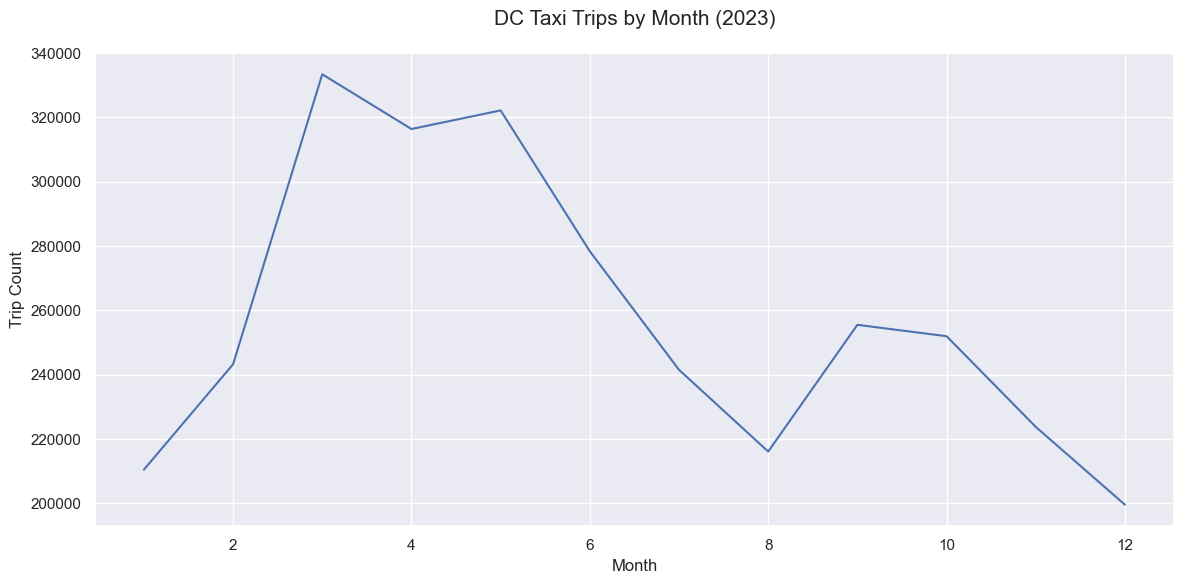

In [57]:
# plot monthly trip counts
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(12,6))

trips_monthly.plot(
    x='month', 
    y='count', 
    legend=False, 
    ax=ax
).set_title(
    'DC Taxi Trips by Month (2023)',
    pad=20, fontsize=15)


plt.xlabel('Month', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)

plt.tight_layout()

Trip activity peaked in the spring months, which is likely in part driven by seasonal attractions, like the National Cherry Blossom Festival that draws high numbers of tourists. 

## 5.2 Plot Hourly Taxi Trips by Weekday

Pivot and sort columns in new dataframe for use in hourly trip visualization. 

In [58]:
# transform data to visualize hourly trips by weekday
# create pivot table dataframe for graphing
table = pd.pivot_table(
    taxi_trips,
    values = 'OBJECTID', 
    index=['hour'],  
    columns=['weekday_name', 'weekday_num'], 
    sort=['weekday_num'],
    aggfunc='count'
)

table.head(24)


weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
weekday_num,4,0,5,6,3,1,2
hour,,,,,,,
0,5409,4393,7798,8014,4252,3766,3741
1,3417,2567,6117,6429,2513,2156,2306
2,2645,2045,4944,5263,2233,1785,2080
3,2639,2133,3541,3901,2888,2392,2623
4,4593,3522,3448,3424,4892,3719,4363
5,7558,5792,5310,4468,7700,5785,7161
6,10228,7943,7265,6346,10844,8853,10124
7,15457,13821,8661,7868,18435,16866,18772


In [59]:
# sort columns by weekday ascending
sorted_table = table.sort_index(axis='columns', level='weekday_num')

sorted_table.head()

weekday_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
weekday_num,0,1,2,3,4,5,6
hour,,,,,,,
0,4393,3766,3741,4252,5409,7798,8014
1,2567,2156,2306,2513,3417,6117,6429
2,2045,1785,2080,2233,2645,4944,5263
3,2133,2392,2623,2888,2639,3541,3901
4,3522,3719,4363,4892,4593,3448,3424


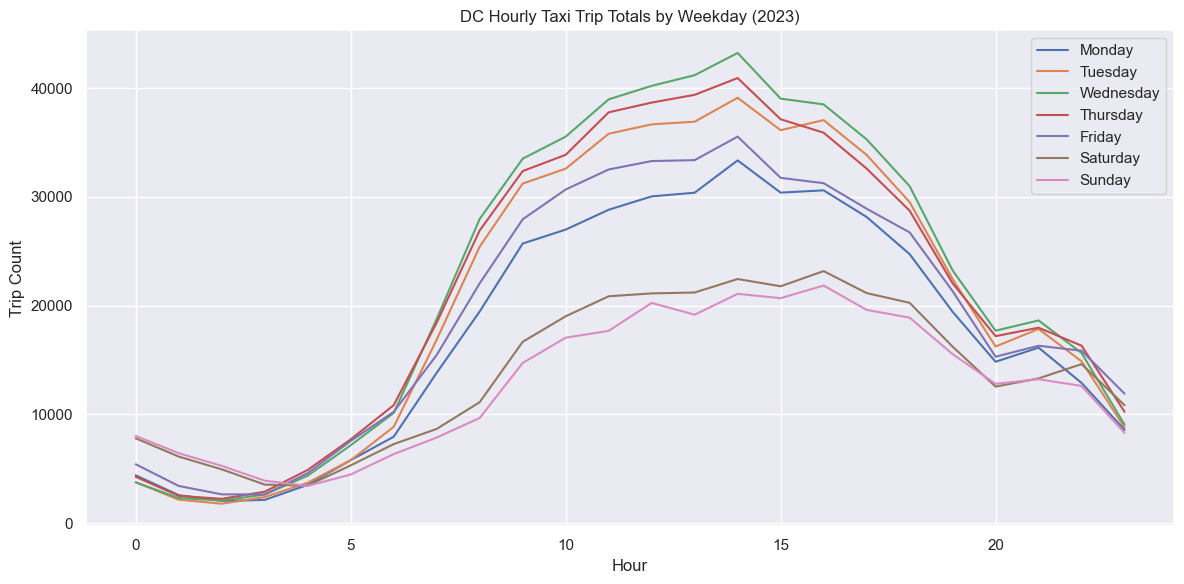

In [60]:
# plot line graph with hourly trip totals grouped by weekday
fig, ax = plt.subplots(figsize=(12,6))

sorted_table.plot(ax=ax).set_title(
    'DC Hourly Taxi Trip Totals by Weekday (2023)')

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)

# provide column name aliases
l = plt.legend()
l.get_texts()[0].set_text('Monday')
l.get_texts()[1].set_text('Tuesday')
l.get_texts()[2].set_text('Wednesday')
l.get_texts()[3].set_text('Thursday')
l.get_texts()[4].set_text('Friday')
l.get_texts()[5].set_text('Saturday')
l.get_texts()[6].set_text('Sunday')

plt.tight_layout()

City-wide trip activity shows a single mid-afternoon peak during weekdays and a large decrease in activity over weekends. 

If the peak hour looks different than the visualization shown, ensure that the time zone was adjusted from UTC to local time.

# 5.3 Plot Average Taxi Speed by Hour of Day

In [61]:
# disable chained assignment warning
pd.options.mode.chained_assignment = None

Create new dataframe with trips excluded that were under 30 seconds, longer than 3 hours 90 miles or longer, or had zero miles recorded. 

Trips recorded with erroneous time duration data (e.g., trip duration of 3 or more hours) may be the result of a taxi meter being left running following a trip ending or even overnight following a driver's shift. Trips longer than 90 miles are removed because those upper outliers skew average data results. Trips with a duration of 0-30 seconds are removed to eliminate cancelled trips. 

In [62]:
# remove outliers and nulls
trips_speed = taxi_trips.loc[ 
    (taxi_trips["DURATION"] >= 30.0)
    & (taxi_trips["DURATION"] <= 10800)
    & (taxi_trips["MILEAGE"] < 90)
    & (taxi_trips["MILEAGE"] != 0)
]

Calculate average trip speed in new column using trip mileage (miles) and duration (seconds).

In [63]:
# calculate average trip speed
trips_speed["avg_speed"] = (trips_speed["MILEAGE"] / trips_speed["DURATION"]) * 60 * 60

trips_speed.head()

,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,pickup_est,hour,weekday_name,weekday_num,month,avg_speed
0,1,15.79,2DA,22202,5.76,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,24.338028
1,2,10.81,20011,20011,3.11,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,17.224615
2,3,13.51,20001,20007,4.80,539.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,32.059369
3,4,12.97,20005,20024,2.68,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,8.128054
4,5,16.48,20001,20002,5.76,876.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,23.671233


Calculate average speed grouped by hour in new dataframe. 

In [64]:
# calculate hourly speed average
trips_speed_avg = trips_speed.groupby(['hour'])['avg_speed'].mean() \
    .reset_index() \
    .rename(columns={'avg_speed':'avg_hourly_speed'})

trips_speed_avg

,hour,avg_hourly_speed
0,0,37.933345
1,1,35.793607
2,2,34.535941
3,3,25.918308
4,4,26.630779
5,5,28.320701
6,6,28.920559
7,7,23.612158
8,8,19.465835
9,9,19.219165


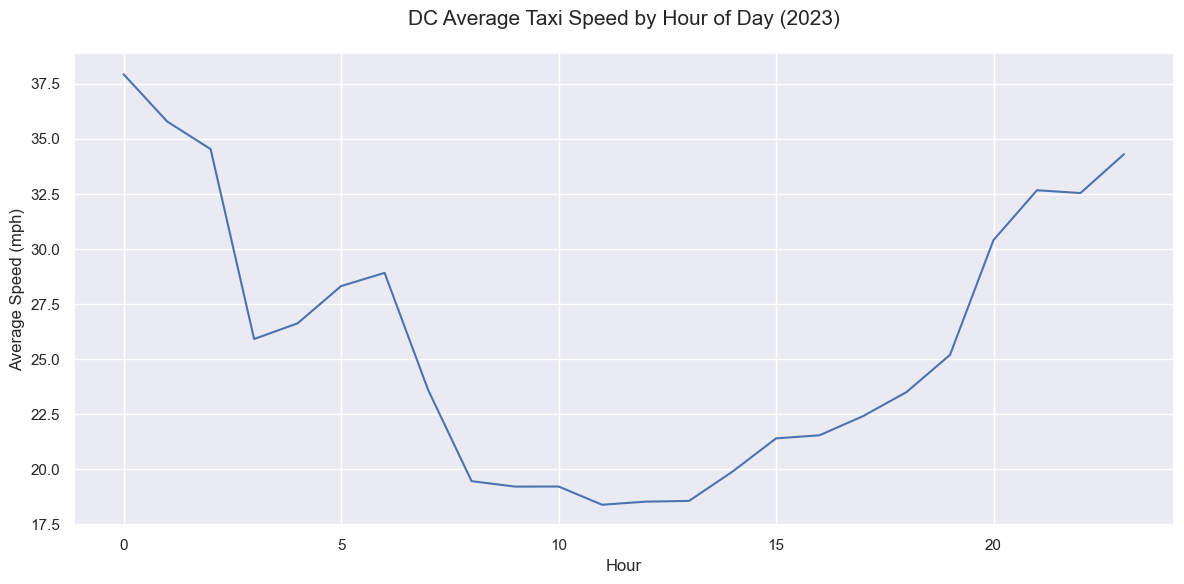

In [65]:
# plot average speed by hour of day
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(12,6))

trips_speed_avg.plot(
    x='hour', 
    y='avg_hourly_speed', 
    legend=False, 
    ax=ax
).set_title(
    'DC Average Taxi Speed by Hour of Day (2023)',
    pad=20, fontsize=15)

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Speed (mph)', fontsize=12)

plt.tight_layout()

Average trip speed is highest late at night, which is unsurprising. However, average trip speeds of nearly 40 mph in a city is relatively high. The following workflow checks for outliers that may skew data distribution.

## 5.3.1 Inspect Data for Invalid Outliers

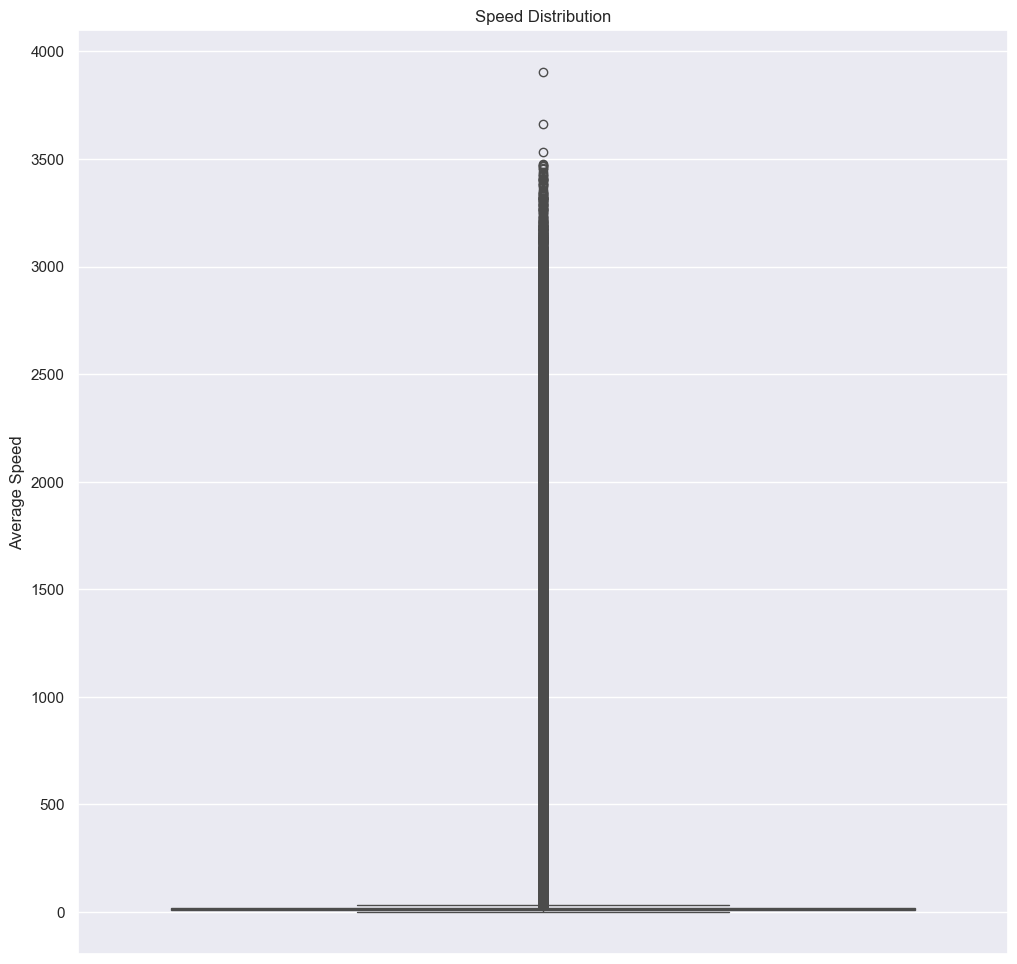

In [66]:
# inspect average speed distribution for outliers
plt.figure(figsize=(12, 12))
sns.boxplot(trips_speed.avg_speed)
plt.title("Speed Distribution")
plt.ylabel("Average Speed")
plt.show()

The box plot shows a large number of trips that exceeded an average speed of 500 mph. That data is not relevant to this analysis, so the following cell filters out trips that had an average speed of at least 70 mph in a new dataframe.

In [67]:
# ignore future warning in bar chart
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Text(0.5, 1.0, 'Speed')

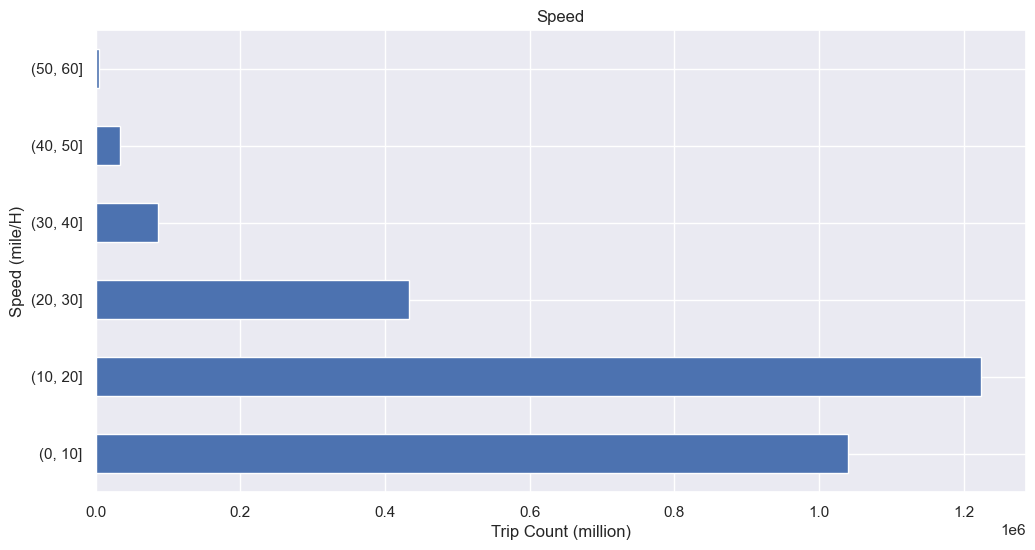

In [68]:
# remove trips with avgerage speed at or over 70 mph, likely invalid speed data
trips_speed_adj = trips_speed[trips_speed.avg_speed <= 70]

# map speed frequency distribution using cleaned data
trips_speed_adj.avg_speed.groupby(
    pd.cut(trips_speed_adj.avg_speed, np.arange(0, 65, 10))
).count().plot(kind="barh", figsize=(12, 6))

plt.xlabel("Trip Count (million)")
plt.ylabel("Speed (mile/H)")
plt.title("Speed")

The frequency distribution plot using the cleaned data shows that a majority of trips had an average speed of 20 mph or less. 

## 5.3.2 Plot Average Taxi Speed (cleaned) 

Calculate and plot a new average hourly trip speed using cleaned data. 

In [69]:
# show average speed by hour using cleaned data
trips_speed_avg_adj = trips_speed_adj.groupby(['hour'])['avg_speed'].mean() \
    .reset_index() \
    .rename(columns={'avg_speed':'avg_hourly_speed'})

trips_speed_avg_adj

,hour,avg_hourly_speed
0,0,17.518034
1,1,16.347408
2,2,16.183081
3,3,17.202207
4,4,18.938683
5,5,18.968956
6,6,17.617441
7,7,15.039259
8,8,13.129287
9,9,13.893594


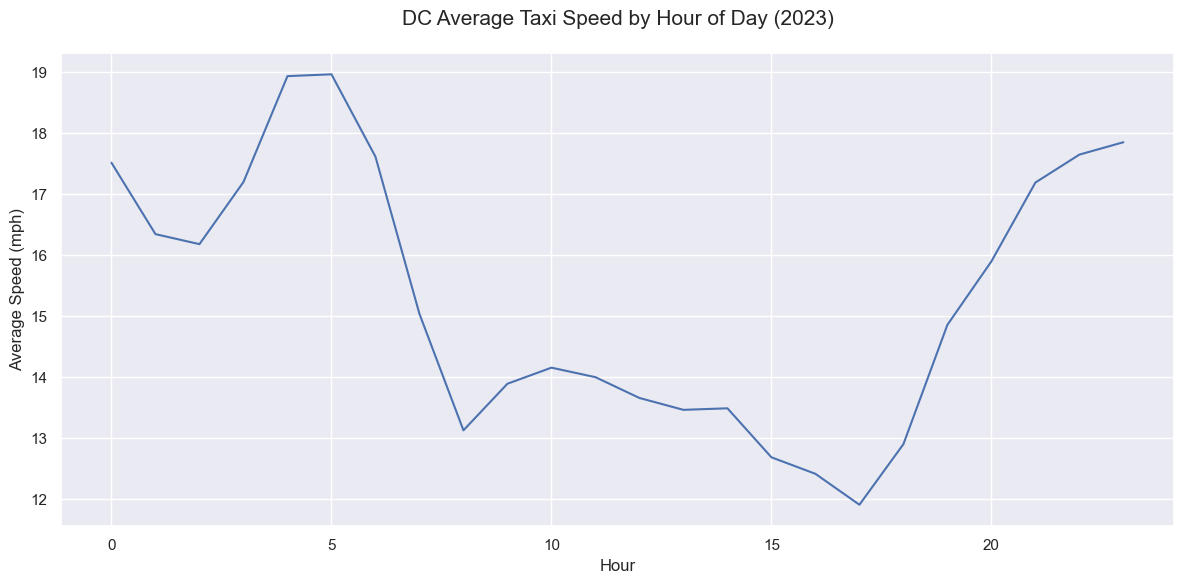

In [70]:
# plot average speed by hour of day using cleaned data
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(12,6))

trips_speed_avg_adj.plot(
    x='hour', 
    y='avg_hourly_speed', 
    legend=False, 
    ax=ax
).set_title(
    'DC Average Taxi Speed by Hour of Day (2023)',
    pad=20, fontsize=15)

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Speed (mph)', fontsize=12)

plt.tight_layout()

The upper end of the speed distribution is now much more in line with expected driving speed in a dense city. 

# 6. Conclusion
This notebook provides a workflow to download a full year of taxi data, load the separate years of data into a single pandas dataframe, and visualize a temporal analysis to reveal trends surrounding trip activity. Extra steps are included to clean data once irregularities become clear through visualization.